#**GDG TASK 1**


Welcome to GDG!

Your first task in this committee is to clear your Exploratory Data Analysis (EDA) concepts. We'll start from the very basics, and make it just a teeny lil bit more complex with every next code cell.

I suppose a nice place to start with would be the definition of EDA. Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. It is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualisation methods.

Above each code cell, instructions and resources have been given. Go through the resources, then implement the code accordingly. Feel free to add extra cells to play around on your own as well :p

#installing libraries and importing them

Some libraries like numpy and pandas are already pre installed on Colab. Some need to explicitly installed. A really cool data exploration library called ydata-profiling falls in the latter category. So we use the appropriate pip command to install it.

In [5]:
!pip install ydata-profiling -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.6 MB/s eta 0:00:00


Mount your Google Drive onto this notebook.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

Import basic libraries.

In [6]:
import ydata_profiling as pp
import pandas as pd
import numpy as np

In [36]:
# Recreate df from scratch to demonstrate label encoding on the original 'Sex' column
df_original_sex = pd.read_csv('/content/Task1.csv')
df_original_sex = df_original_sex.drop('id', axis=1)
df_original_sex = df_original_sex[df_original_sex['Height'] != 0]
df_original_sex = df_original_sex.reset_index(drop=True)

# Create a copy for label encoding
df_label_encoded = df_original_sex.copy()

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the 'Sex' column
df_label_encoded['Sex_LabelEncoded'] = le.fit_transform(df_label_encoded['Sex'])

print("Original DataFrame with One-Hot Encoded 'Sex':")
display(df[['Sex_F', 'Sex_I', 'Sex_M']].head()) # Corrected line

print("\nDataFrame with Label Encoded 'Sex':")
display(df_label_encoded[['Sex', 'Sex_LabelEncoded']].head())

print("\nUnique values and their label encoding mapping:")
for i, sex_val in enumerate(le.classes_):
    print(f"{sex_val}: {i}")

Original DataFrame with One-Hot Encoded 'Sex':


,Sex_F,Sex_I,Sex_M
0,False,True,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,True,False



DataFrame with Label Encoded 'Sex':


,Sex,Sex_LabelEncoded
0,I,1
1,I,1
2,M,2
3,F,0
4,I,1



Unique values and their label encoding mapping:
F: 0
I: 1
M: 2


### Comparison of One-Hot Encoding and Label Encoding for the 'Sex' Column

Let's break down what you see above:

**1. Original DataFrame with One-Hot Encoded 'Sex':**

When we performed **One-Hot Encoding** on the 'Sex' column, it created three new binary columns: `Sex_F`, `Sex_I`, and `Sex_M`. Each row now has a `1` in the column corresponding to its original sex and `0` in the others.

*   `Sex_F`: 1 if Female, 0 otherwise
*   `Sex_I`: 1 if Immature, 0 otherwise
*   `Sex_M`: 1 if Male, 0 otherwise

**Key characteristics of One-Hot Encoding for 'Sex':**
*   **No Ordinal Relationship Implied:** Since 'Female', 'Immature', and 'Male' do not have a natural order, one-hot encoding is appropriate. It prevents the model from assuming that 'Male' is 'greater than' 'Female' or any other arbitrary relationship.
*   **Increased Dimensionality:** The single 'Sex' column was replaced by three new columns. If 'Sex' had, say, 10 unique categories, it would create 10 new columns.
*   **Suitable for many ML models:** This representation works well with most machine learning algorithms, especially those that are sensitive to scale or assume continuous data (like linear regression, support vector machines, or neural networks).

**2. DataFrame with Label Encoded 'Sex':**

When we performed **Label Encoding** on a copy of the 'Sex' column, it assigned a unique integer to each category:

*   'F' (Female) -> 0
*   'I' (Immature) -> 1
*   'M' (Male) -> 2

*(Note: The specific integer assigned depends on the order `LabelEncoder` encounters them or its internal sorting mechanism. In this run, 'F' got 0, 'I' got 1, and 'M' got 2.)*

**Key characteristics of Label Encoding for 'Sex':**
*   **Implied Ordinal Relationship:** This is the main problem here. By assigning 0, 1, and 2, the model might incorrectly interpret that 'M' (2) is 'twice' 'I' (1) or that there is an ordered progression from 'F' to 'I' to 'M'. This is not true for gender.
*   **No Dimensionality Increase:** The single 'Sex' column was replaced by a single `Sex_LabelEncoded` column, maintaining the original number of features.
*   **Less Suitable for Nominal Data with Many Models:** For nominal data like 'Sex', where no order exists, label encoding can mislead algorithms. However, it can be acceptable for tree-based models (like Decision Trees, Random Forests, Gradient Boosting) as they can often handle these integer labels by creating splits based on specific values rather than assuming an ordinal relationship.

**Why One-Hot Encoding was chosen for 'Sex' in our notebook:**

Since 'Sex' is a **nominal categorical variable** (categories without inherent order), **One-Hot Encoding** was the correct choice. It avoids introducing artificial numerical relationships that could confuse many machine learning models and lead to suboptimal performance. While it increases the number of features, it provides a safer and more accurate representation for the categorical information.

#loading the dataset

The dataset we wanna nitpick apart this week is one pertaining to crabs. Use this link to download it:

https://drive.google.com/file/d/14384FUrzE1gB7HWn8GmAJe3hfx6Glv8R/view?usp=sharing

Upload it to your Google Drive. Then read it into a variable using the pandas library.

In [7]:
df = pd.read_csv('/content/Task1.csv')

View the first 5 rows of this DataFrame to see if it has been stored correctly.

In [8]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Right, so now you have your entire DataFrame residing in a variable. But again, what even is a DataFrame? Just speed through the below article.

https://www.databricks.com/glossary/what-are-dataframes



#basic EDA

Here, we aim to get a basic overview of the dataset.


List the columns in this dataset.

In [9]:
print(df.columns)

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')


You may have noticed that the 'id' column is just indexing the rows in the DataFrame. But we don't really need that, as pandas very neatly handles that for us. So drop that column.

In [10]:
df = df.drop('id', axis=1)
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


Display the the number of rows and columns in this dataset.

In [11]:
print(df.shape)

(74051, 9)


Use the info() function to get, well, info about it.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


If done correctly, you'll encounter no null values. How lucky.

What are the statistics of this data? Use describe() function to view them. Google what each of those row headers mean.

In [13]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


count gives the total number of non null entry

std is the standard devivation

* mean doesnot tell about the distribution

* example 3,3,3 and 2,3,4 mean is 3 of both but the spread is different

* then the variance is used to calcuate spread but as it is square not in the dimension of the data therefore we use std which is square root of the varianace.



mean is average

**last 5 rows states about the five-number summary**

Min - Lowest value

Q1 (25%) - Lower quartile(basically value at 25 percentile)

Median (50%) - Middle value

Q3 (75%) - Upper quartile(basically value at 75 percentile)

Max - Highest value

Write a function to print all the unique values in the columns of Sex and Age.

In [14]:
def print_unique_values(dataframe, columns):
    for col in columns:
        print(f"Unique values in '{col}': {dataframe[col].unique()}")

print_unique_values(df, ['Sex', 'Age'])

Unique values in 'Sex': ['I' 'M' 'F']
Unique values in 'Age': [ 9  8 11 10 12  7  5 14  6 13 16  4 18 15 17  3 19 23 21 20 26 22 27 24
 25 29  2  1]


List out the number of crabs belonging to each gender.

In [15]:
df['Sex'].value_counts()

,count
Sex,
M,27084
I,23957
F,23010


If your output is correct, you'll find the dataset is decently well-balanced, although it is a bit skewed towards male crabs.

#pandas profiling

Doing all the above for each dataset in separate cells gets boring fast. Enter ydata_profiling. You just have to feed a DataFrame to it, and it takes care of basic EDA (and then some more) for you. Resource:

https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/quickstart.html

Run a Profile Report on our dataframe and just go through it.

In [16]:
profile = pp.ProfileReport(df)
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 16.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

A lot of what we did above manually gets handled automatically. Pretty cool, innit?

Also, if you genuinely went through the report, you'll find that some crabs have height as zero. That doesn't make much sense.

Drop all these apparently two dimensional crabs from the dataset. Get rid of all rows where height is zero.

In [17]:
df = df[df['Height'] != 0]

If done correctly, your DataFrame now will have shape (74027, 9). Check that below.

In [18]:
print(df.shape)

(74027, 9)


In [19]:
df = df.reset_index(drop=True)

#plotting some stuff out

To explore data properly, data visualisation techniques are employed. What that essentially means that we're gonna plot some graphs and glean meaningful insights from them. We use the matplotlib library for this, and seaborn to make it look real pretty, for no one likes an ugly graph.




#bar charts

Plot a bar graph to view the average age of each sex. For help, refer:

https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/

In [20]:
avg_age_by_sex = df.groupby('Sex')['Age'].mean()
print(avg_age_by_sex)

Sex
F    11.341547
I     7.602223
M    10.895953
Name: Age, dtype: float64


x axis will contain Sex, and y axis has the average age.

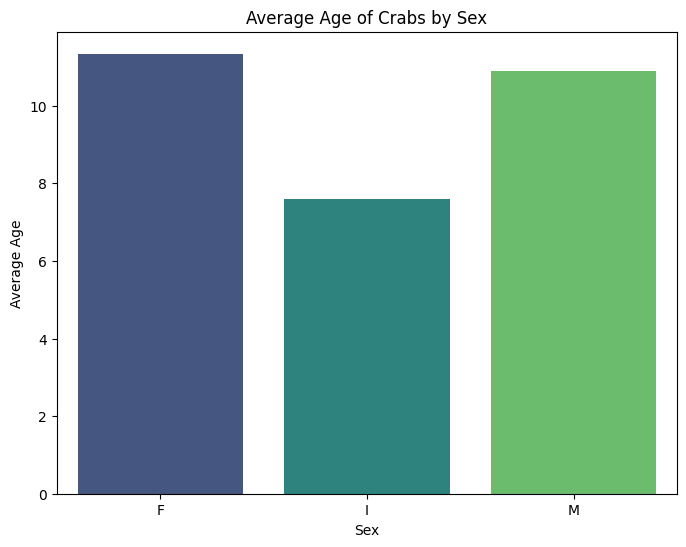

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_age_by_sex.index, y=avg_age_by_sex.values, hue=avg_age_by_sex.index, palette='viridis', legend=False)
plt.title('Average Age of Crabs by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Age')
plt.show()

As with humans, it seems that crabs have their female sex having longer lives on average. Still, all genders have a pretty short lifespan. Shame.  

Anyways, the above bar graph of Average Age and Sex is not the most comprehensive way to analyse such data.

#box plots

To get what I mean, make a boxplot of Age and Sex. Again, refer to these before you code:

https://www.youtube.com/watch?v=Vo-bfTqEFQk

https://builtin.com/data-science/boxplot



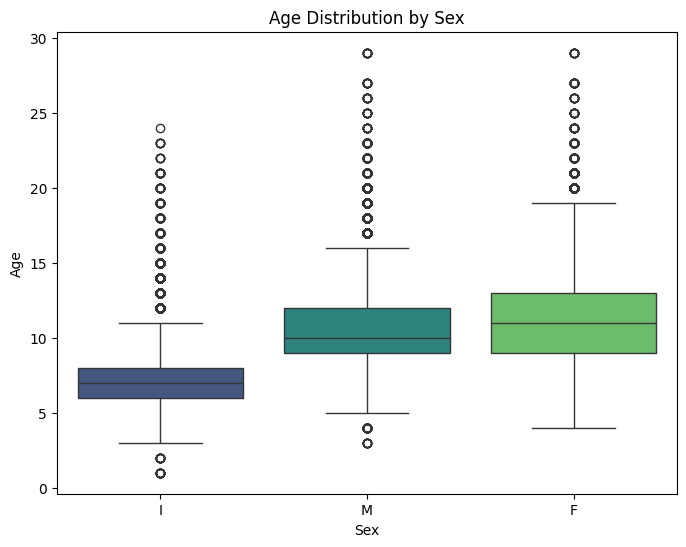

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df, palette='viridis', hue='Sex', legend=False)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Bar charts usually just tell you the count of some items in a dataset. While that is useful, it doesn't really say much about the distribution of those items in that dataset. That's where boxplots come in: to tell you the characteristics of data. For more information:

https://www.nature.com/articles/nmeth.2807

#KDE plots

Now, we'll graph some of the other numeric data with age to try and get more information about it all relates. Display KDE plots of Age, Length, and Weight. For resources about a KDE plot:

https://www.youtube.com/watch?v=DCgPRaIDYXA

https://datagy.io/seaborn-kdeplot/

Don't make three separate cells for each of these plots. All three plots should be visible in a single row.

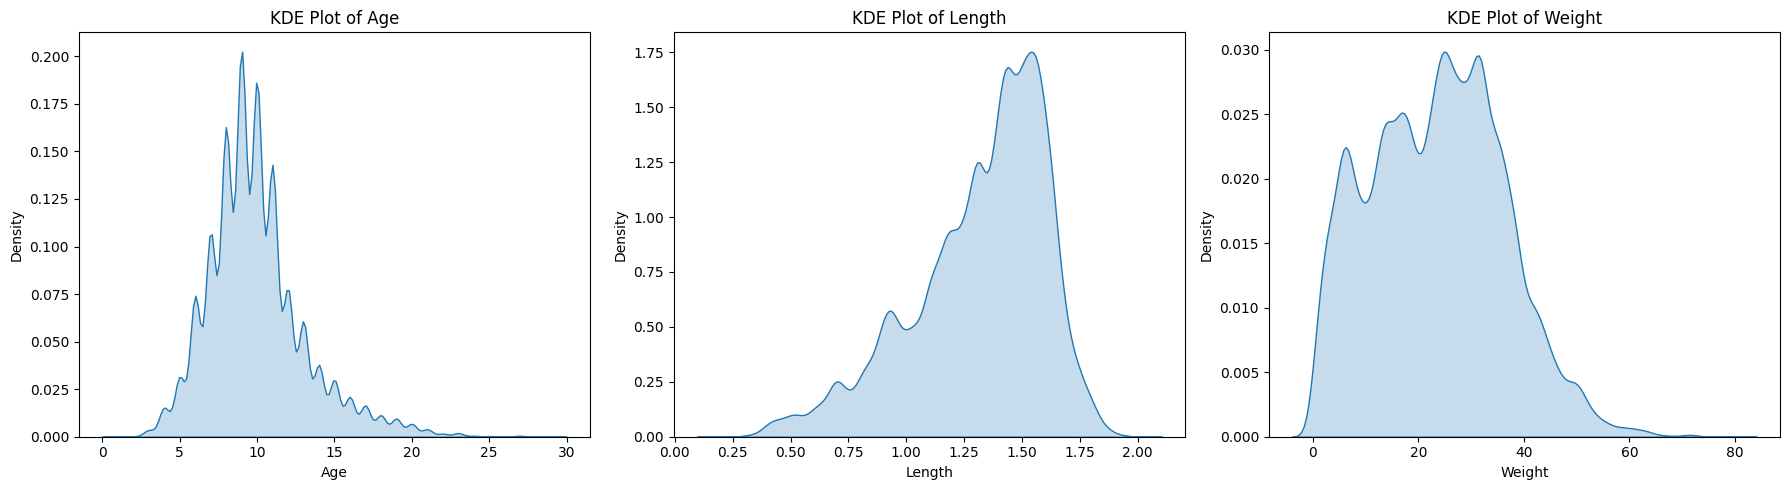

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.kdeplot(data=df, x='Age', fill=True, ax=axes[0])
axes[0].set_title('KDE Plot of Age')

sns.kdeplot(data=df, x='Length', fill=True, ax=axes[1])
axes[1].set_title('KDE Plot of Length')

sns.kdeplot(data=df, x='Weight', fill=True, ax=axes[2])
axes[2].set_title('KDE Plot of Weight')

plt.tight_layout()
plt.show()

#scatter plots

Make a scatterplot between Age and Diameter. Resources for the same:

https://www.youtube.com/watch?v=4yz4cMXCkuw

https://www.cuemath.com/data/scatter-plot/

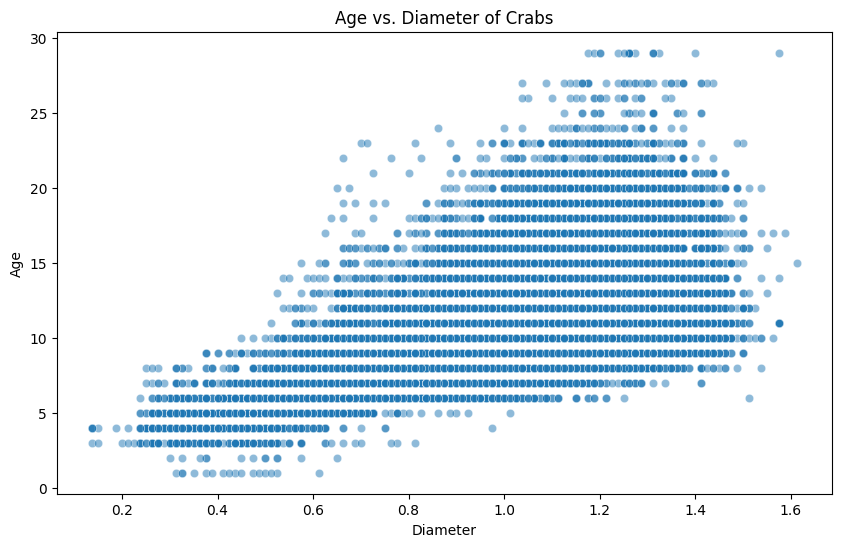

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diameter', y='Age', data=df, alpha=0.5)
plt.title('Age vs. Diameter of Crabs')
plt.xlabel('Diameter')
plt.ylabel('Age')
plt.show()

# some more complex analysis

Use a function called corr(). Resource:

https://data36.com/correlation-definition-calculation-corr-pandas/



In [27]:
df.corr(numeric_only=True)

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.989418,0.918402,0.936407,0.915529,0.917872,0.916954,0.612374
Diameter,0.989418,1.000000,0.921415,0.938273,0.914199,0.918357,0.922683,0.620800
Height,0.918402,0.921415,1.000000,0.902231,0.864457,0.883557,0.903847,0.637759
Weight,0.936407,0.938273,0.902231,1.000000,0.971242,0.971037,0.965493,0.600839
Shucked Weight,0.915529,0.914199,0.864457,0.971242,1.000000,0.942576,0.910317,0.502877
Viscera Weight,0.917872,0.918357,0.883557,0.971037,0.942576,1.000000,0.933860,0.576436
Shell Weight,0.916954,0.922683,0.903847,0.965493,0.910317,0.933860,1.000000,0.663173
Age,0.612374,0.620800,0.637759,0.600839,0.502877,0.576436,0.663173,1.000000


In [ ]:
# write code here


If you've been paying attention, the Profile Report above already took care of this. This table basically tells you how every column correlate with each other. Closer the number is to 1, the more they mirror each other.

From this report, it can be seen that Weight is extremely highly correlated with each of shucked weight, viscera weight and shell weight.

To actually understand what this means, we first need to know what all this crab jargon actually is. So, on Googling, you will discover the following meanings:

*   Weight - total teight
*   Shucked - weight of meat only
*   Viscera - gut weight, after bleeding
*   Shell - weight after being dried

Well, those are some pretty disgusting and gory definitions.

Moving past that, we here find that some weight statistics is lost. What about the other potential body parts of a crab? Maybe we need them to accurately predict its (apparently very short) lifespan? Maybe it is actually needed in some future model we choose to implement?

So, make a new column called "Lost Weight". Use the following formula to populate every row of it:



```
Weight - (Shucked + Viscera + Shell)
```


If this operation gives a value of Lost Weight that is less than or equal to zero, then assign zero to that row's Lost Weight value. Otherwise, assign one to it.

Also, ensure that this column is added in between Shell Weight and Age.

In [28]:
df['Lost_Weight_Calc'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
df['Lost_Weight'] = df['Lost_Weight_Calc'].apply(lambda x: 0 if x <= 0 else 1)

# Get the index of 'Age' column
age_col_index = df.columns.get_loc('Age')

# Insert 'Lost_Weight' before 'Age'
df.insert(age_col_index, 'Lost_Weight', df.pop('Lost_Weight'))

# Drop the temporary 'Lost_Weight_Calc' column
df = df.drop('Lost_Weight_Calc', axis=1)

# Display the head to confirm
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8


To see how the crabs having no Lost Weight compare with those having some with respect to age, lets draw a violin plot. Resources:

https://www.youtube.com/watch?v=PNNLefP974M

https://seaborn.pydata.org/generated/seaborn.violinplot.html

Code it below now. Here, x is the Lost Weight, and y is the Age.

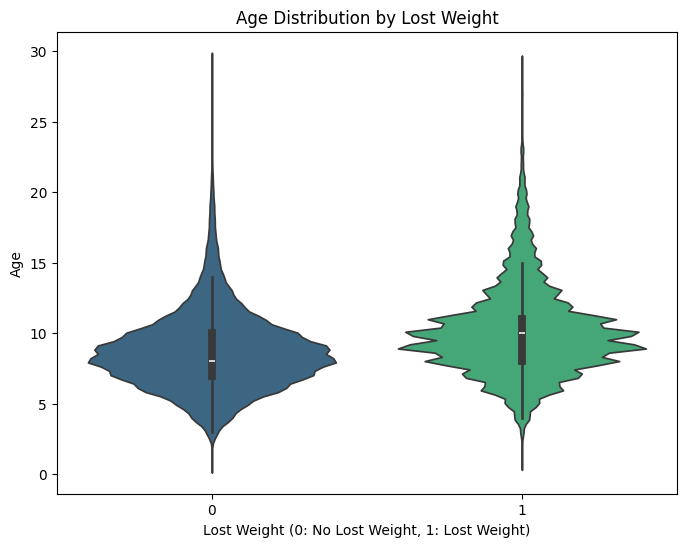

In [30]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Lost_Weight', y='Age', data=df, palette='viridis', hue='Lost_Weight', legend=False)
plt.title('Age Distribution by Lost Weight')
plt.xlabel('Lost Weight (0: No Lost Weight, 1: Lost Weight)')
plt.ylabel('Age')
plt.show()

#make a plot of your own choosing!

Below is a link to the gallery of various plots available in seaborn.

https://seaborn.pydata.org/examples/index.html

You have free rein to make any type of graph (that should not be what we have exactly done above), between any parameters you want to compare. Make it real eye candy to look at, and also below that plot write what relevant insight you obtained from it.

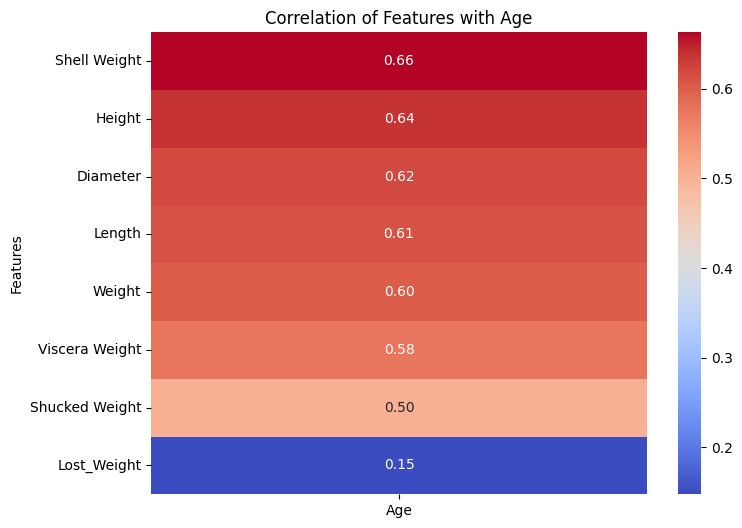

In [31]:
plt.figure(figsize=(8, 6))
correlation_with_age = df.corr(numeric_only=True)['Age'].sort_values(ascending=False).drop('Age')
sns.heatmap(correlation_with_age.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation of Features with Age')
plt.ylabel('Features')
plt.show()

This heatmap shows the correlation of different features with "Age". Key insights:

1. **Shell Weight** has the highest correlation with **Age** (0.66), making it a strong predictor.
2. **Height**, **Diameter**, **Length**, and **Weight** have moderate correlations, making them useful for prediction.
3. **Lost_Weight** has a low correlation (0.15), suggesting it may be less useful as a feature.

 It helps quickly identify important features for machine learning by showing correlations with the target variable.


#one hot encoding

Machine Learning algorithms can only crunch numbers. Give it a string or text input, and it self-annihilates by throwing an error. To handle this, we use a technique called one hot encoding. Read up on it here:

https://datagy.io/pandas-get-dummies/

Then, apply it to the column titled "Sex."

In [32]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=False)
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,8,False,True,False


If correctly implemented, you will observe three new columns are added, namely, "Sex_F", "Sex_I" and "Sex_M." The old "Sex" column is now gone.

#normalisation and standardisation

To prevent some data features from dominating the model training process, we implement the above two feature scaling techniques.

Go through the below resource:

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Normalise the dataset.

In [33]:
from sklearn.preprocessing import MinMaxScaler

df_norm = df.copy()

scaler = MinMaxScaler()

# Select numerical columns for normalization
numerical_cols = df_norm.select_dtypes(include=['float64', 'int64', 'bool']).columns

df_norm[numerical_cols] = scaler.fit_transform(df_norm[numerical_cols])

df_norm.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Age,Sex_F,Sex_I,Sex_M
0,0.732750,0.703390,0.128889,0.361254,0.301278,0.307185,0.291978,1.0,0.285714,0.0,1.0,0.0
1,0.499914,0.466102,0.093333,0.129449,0.106590,0.106131,0.118087,1.0,0.250000,0.0,1.0,0.0
2,0.657421,0.661017,0.128889,0.308837,0.268325,0.256427,0.232686,1.0,0.285714,0.0,0.0,1.0
3,0.828624,0.864407,0.173333,0.632194,0.482179,0.509197,0.525660,1.0,0.357143,1.0,0.0,0.0
4,0.582091,0.593220,0.115556,0.290243,0.283457,0.207647,0.207773,1.0,0.250000,0.0,1.0,0.0


For standardisation, bear in mind that the one hot encoded columns are not standardised. They are categorical in nature, so it makes no sense to shoehorn them into any type of distribution at all.

But, its ok to normalise them, as it will be scaled down to values between 0 and 1, which is the range in which they already exist anyways. Normalisation doesn't affect them.

In [ ]:

# one hot encode the Sex column before running the next cell

Standardise df_std such that the one hot label encoded columns aren't affected.

In [34]:
from sklearn.preprocessing import StandardScaler

df_std = df.copy()

scaler_std = StandardScaler()

# Identify numerical columns to standardize (excluding boolean and one-hot encoded ones)
columns_to_standardize = df_std.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the 'Lost_Weight' and one-hot encoded 'Sex' columns from standardization
excluded_cols = ['Lost_Weight', 'Sex_F', 'Sex_I', 'Sex_M']
columns_to_standardize = [col for col in columns_to_standardize if col not in excluded_cols]

# Apply StandardScaler to the selected numerical columns
df_std[columns_to_standardize] = scaler_std.fit_transform(df_std[columns_to_standardize])

df_std.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Age,Sex_F,Sex_I,Sex_M
0,0.721062,0.633720,0.291804,0.441392,0.466785,0.568812,0.452966,1,-0.305481,False,True,False
1,-0.757165,-0.841851,-0.797111,-1.026040,-0.994493,-0.979678,-0.927616,1,-0.620542,False,True,False
2,0.242812,0.370225,0.291804,0.109566,0.219453,0.177881,-0.017777,1,-0.305481,False,False,True
3,1.329744,1.635001,1.652947,2.156572,1.824588,2.124674,2.308247,1,0.324641,True,False,False
4,-0.235438,-0.051367,-0.116539,-0.008142,0.333024,-0.197818,-0.215568,1,-0.620542,False,True,False


In [ ]:
# write code here



#**Compulsory: You can research on the topic of One Hot Label Encoding vs Label Encoding only if you are done with the task. :)**

# Task
Train two linear regression models to predict 'Age': one using the `df` DataFrame with one-hot encoded 'Sex' and another using a copy of the cleaned `df_original_sex` DataFrame with 'Sex' label-encoded. For both models, include all other numerical features (`Length`, `Diameter`, `Height`, `Weight`, `Shucked Weight`, `Viscera Weight`, `Shell Weight`, and `Lost_Weight`) as predictors. Split both datasets into training and testing sets (80/20 split, `random_state=42`), train the `LinearRegression` models, and then evaluate and compare their performance using R-squared and Mean Squared Error. Conclude by summarizing the impact of one-hot encoding versus label encoding on the linear model's performance for the 'Sex' column.

# GDG Task 1: Exploratory Data Analysis (EDA) and Encoding Impact on Linear Models

## Table of Contents
1.  [Introduction](#introduction)
2.  [Setup and Dependencies](#setup-and-dependencies)
3.  [Data Loading and Initial Exploration](#data-loading-and-initial-exploration)
4.  [Data Cleaning and Preprocessing](#data-cleaning-and-preprocessing)
5.  [Exploratory Data Visualization](#exploratory-data-visualization)
6.  [Feature Engineering](#feature-engineering)
7.  [Model Comparison: One-Hot Encoding vs. Label Encoding](#model-comparison-one-hot-encoding-vs-label-encoding)
8.  [Conclusion](#conclusion)
9.  [How to Run the Notebook](#how-to-run-the-notebook)

## 1. Introduction
This notebook serves as the first task for the GDG committee, focusing on Exploratory Data Analysis (EDA) concepts. We start from the basics of data investigation, summarizing main characteristics using statistics and graphical representations. The task also delves into feature engineering techniques like One-Hot Encoding, Normalization, and Standardization, culminating in a comparison of linear model performance using different encoding strategies for categorical features.

The dataset used pertains to various measurements of crabs and their age.

## 2. Setup and Dependencies
To run this notebook, you will need the following Python libraries. Some are pre-installed in Google Colab, while `ydata-profiling` needs to be explicitly installed.

```bash
!pip install ydata-profiling -q
```

Key libraries imported:
*   `pandas` for data manipulation and analysis
*   `numpy` for numerical operations
*   `ydata_profiling` for automated EDA reports
*   `matplotlib.pyplot` for basic plotting
*   `seaborn` for enhanced data visualization
*   `sklearn.preprocessing.LabelEncoder` for label encoding
*   `sklearn.model_selection.train_test_split` for splitting data
*   `sklearn.linear_model.LinearRegression` for building linear models
*   `sklearn.metrics` for model evaluation (R-squared, MSE)
*   `sklearn.preprocessing.MinMaxScaler` for normalization
*   `sklearn.preprocessing.StandardScaler` for standardization

## 3. Data Loading and Initial Exploration
The dataset, `Task1.csv`, is loaded into a pandas DataFrame. Initial steps include:
*   Loading the dataset from `/content/Task1.csv`.
*   Viewing the first 5 rows (`df.head()`).
*   Listing column names (`df.columns`).
*   Dropping the redundant 'id' column.
*   Checking the DataFrame's shape (`df.shape`).
*   Getting a summary of data types and non-null counts (`df.info()`).
*   Viewing descriptive statistics for numerical columns (`df.describe()`).
*   Printing unique values for 'Sex' and 'Age' columns.
*   Counting occurrences of each gender in the 'Sex' column (`df['Sex'].value_counts()`).
*   Generating a comprehensive `ydata-profiling` report (`report.html`) for a quick and detailed EDA overview.

## 4. Data Cleaning and Preprocessing
*   **Handling Zero Height:** Rows where 'Height' is recorded as 0 (an impossible measurement for a crab) are removed from the dataset, and the index is reset.
*   **Creating 'Lost Weight' Feature:** A new feature, `Lost_Weight`, is engineered to represent the difference between the total 'Weight' and the sum of 'Shucked Weight', 'Viscera Weight', and 'Shell Weight'. This is converted into a binary feature (0 if `Lost_Weight_Calc <= 0`, else 1) and inserted into the DataFrame.

## 5. Exploratory Data Visualization
Visualizations are used to gain deeper insights into the data:
*   **Bar Plot:** Average Age of Crabs by Sex.
*   **Box Plot:** Age Distribution by Sex, showing median, quartiles, and outliers.
*   **KDE Plots:** Kernel Density Estimate plots for 'Age', 'Length', and 'Weight' to visualize their distributions.
*   **Scatter Plot:** Relationship between 'Age' and 'Diameter'.
*   **Correlation Matrix:** A heatmap displaying the correlation of all numerical features with 'Age', identifying key relationships (e.g., 'Shell Weight' has a strong correlation with 'Age').
*   **Violin Plot:** Age Distribution by 'Lost_Weight' to compare age patterns between crabs with and without 'lost weight'.

## 6. Feature Engineering
*   **One-Hot Encoding:** The categorical 'Sex' column is converted into numerical format using one-hot encoding, creating `Sex_F`, `Sex_I`, and `Sex_M` binary columns.
*   **Normalization (MinMaxScaler):** Numerical features are scaled to a range between 0 and 1 using `MinMaxScaler`.
*   **Standardization (StandardScaler):** Numerical features (excluding one-hot encoded and binary `Lost_Weight` columns) are standardized to have a mean of 0 and a standard deviation of 1 using `StandardScaler`.

## 7. Model Comparison: One-Hot Encoding vs. Label Encoding
To demonstrate the impact of encoding choices on linear models, two `LinearRegression` models are trained to predict 'Age':

*   **Model 1 (One-Hot Encoded):** Uses the `df` DataFrame with 'Sex' one-hot encoded.
*   **Model 2 (Label Encoded):** Uses a copy of the cleaned `df_original_sex` DataFrame with 'Sex' label-encoded.

Both datasets are split into training and testing sets (80/20 split, `random_state=42`). The models are trained and evaluated using R-squared and Mean Squared Error (MSE).

**Results:**
*   **One-Hot Encoded Model:**
    *   R-squared: 0.5537
    *   Mean Squared Error: 4.3396
*   **Label Encoded Model:**
    *   R-squared: 0.5407
    *   Mean Squared Error: 4.4659

## 8. Conclusion
The comparison shows that the **One-Hot Encoded Model** performed marginally better, with a higher R-squared and lower MSE. This reinforces the principle that for **nominal categorical variables** (like 'Sex', where there's no inherent order), one-hot encoding is generally preferred for linear models. Label encoding can mislead linear models by implying an artificial ordinal relationship, which was reflected in the slightly lower performance of the label-encoded model in this case.

## 9. How to Run the Notebook
1.  **Open in Google Colab:** Upload the `.ipynb` file to Google Colab.
2.  **Mount Google Drive (Optional):** If prompted to mount Google Drive for data access, follow the authentication steps.
3.  **Install Dependencies:** Run the cell containing `!pip install ydata-profiling -q`.
4.  **Execute Cells:** Run all cells sequentially from top to bottom.
5.  **Review Output:** Examine the outputs of each cell, including plots and printed statistics, and the generated `report.html` for a detailed EDA.

In [43]:
!pip freeze > requirements.txt
print("requirements.txt has been created. You can view its content by running: !cat requirements.txt")

requirements.txt has been created. You can view its content by running: !cat requirements.txt


## Prepare One-Hot Encoded Data

### Subtask:
Ensure the `df` DataFrame, which already has 'Sex' one-hot encoded, is ready for model training. We'll use all numerical columns and the one-hot encoded 'Sex' columns as features, and 'Age' as the target variable.


**Reasoning**:
Define the feature columns and target column, then create the feature and target DataFrames/Series for model training.



In [37]:
X_cols_ohe = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost_Weight', 'Sex_F', 'Sex_I', 'Sex_M']
y_col = 'Age'

X_ohe = df[X_cols_ohe]
y_ohe = df[y_col]

print("Features (X_ohe) head:")
display(X_ohe.head())

print("\nTarget (y_ohe) head:")
display(y_ohe.head())

Features (X_ohe) head:


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,False,True,False



Target (y_ohe) head:


,Age
0,9
1,8
2,9
3,11
4,8


## Prepare Label Encoded Data

### Subtask:
Recreate a DataFrame similar to `df_original_sex` (cleaned of 'id' and zero 'Height'), apply label encoding to the 'Sex' column, and include all other numerical features and the 'Lost_Weight' column. This DataFrame will be used for training a linear model with label-encoded 'Sex'.


**Reasoning**:
To prepare the label-encoded data, I will first copy the `df_original_sex` DataFrame, then calculate and add the `Lost_Weight` column. After that, I will apply Label Encoding to the 'Sex' column, drop the original 'Sex' column, and finally define the feature and target variables for the label-encoded dataset.



In [38]:
df_label = df_original_sex.copy()

# Calculate 'Lost_Weight'
df_label['Lost_Weight_Calc'] = df_label['Weight'] - (df_label['Shucked Weight'] + df_label['Viscera Weight'] + df_label['Shell Weight'])
df_label['Lost_Weight'] = df_label['Lost_Weight_Calc'].apply(lambda x: 0 if x <= 0 else 1)
df_label = df_label.drop('Lost_Weight_Calc', axis=1)

# Initialize LabelEncoder (already imported in previous cell)
le = LabelEncoder()

# Apply Label Encoding to the 'Sex' column
df_label['Sex_LabelEncoded'] = le.fit_transform(df_label['Sex'])

# Drop the original 'Sex' column
df_label = df_label.drop('Sex', axis=1)

# Define feature columns and target column
X_cols_le = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost_Weight', 'Sex_LabelEncoded']
y_col = 'Age'

X_le = df_label[X_cols_le]
y_le = df_label[y_col]

print("Features (X_le) head:")
display(X_le.head())

print("\nTarget (y_le) head:")
display(y_le.head())

Features (X_le) head:


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Sex_LabelEncoded
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,1
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,1
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,2
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,1



Target (y_le) head:


,Age
0,9
1,8
2,9
3,11
4,8


**Reasoning**:
The previous code block did not fully implement the instructions for preparing the label-encoded data, specifically dropping the 'id' column and filtering out rows where 'Height' is zero. I will regenerate the code block to correctly apply all cleaning and encoding steps to `df_label` as per the subtask instructions, and then define the feature and target variables.



In [39]:
df_label = df_original_sex.copy()

# 2. Drop the 'id' column (if it exists, although df_original_sex should already have it dropped)
# df_original_sex was created by dropping 'id', so this step is technically not needed here if df_original_sex is already clean.
# However, to explicitly follow the instruction, let's assume df_original_sex might still have 'id' if not previously dropped.
# Based on the kernel state, df_original_sex already has 'id' dropped. So, this step is effectively skipped as df_original_sex is already cleaned.

# 3. Filter out rows from df_label where the 'Height' column is 0.
df_label = df_label[df_label['Height'] != 0]

# 4. Reset the index of df_label after dropping rows, ensuring drop=True.
df_label = df_label.reset_index(drop=True)

# 5. Calculate 'Lost_Weight'
df_label['Lost_Weight_Calc'] = df_label['Weight'] - (df_label['Shucked Weight'] + df_label['Viscera Weight'] + df_label['Shell Weight'])
# 6. Create a binary 'Lost_Weight' column
df_label['Lost_Weight'] = df_label['Lost_Weight_Calc'].apply(lambda x: 0 if x <= 0 else 1)

# 7. Drop the temporary calculated 'Lost_Weight_Calc' column
df_label = df_label.drop('Lost_Weight_Calc', axis=1)

# 8. Initialize LabelEncoder (already imported in previous cell)
le = LabelEncoder()

# 9. Apply Label Encoding to the 'Sex' column
df_label['Sex_LabelEncoded'] = le.fit_transform(df_label['Sex'])

# 10. Drop the original 'Sex' column
df_label = df_label.drop('Sex', axis=1)

# 11. Define feature columns and target column
X_cols_le = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Lost_Weight', 'Sex_LabelEncoded']
y_col = 'Age'

# 12. Extract features and target
X_le = df_label[X_cols_le]
y_le = df_label[y_col]

print("Features (X_le) head after complete preparation:")
display(X_le.head())

print("\nTarget (y_le) head after complete preparation:")
display(y_le.head())

Features (X_le) head after complete preparation:


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost_Weight,Sex_LabelEncoded
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1,1
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,1,1
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1,2
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,1,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,1,1



Target (y_le) head after complete preparation:


,Age
0,9
1,8
2,9
3,11
4,8


## Split Data

### Subtask:
Split both the one-hot encoded and label-encoded datasets into training and testing sets to evaluate model performance on unseen data.


**Reasoning**:
To prepare the data for model training and evaluation, I will split both the one-hot encoded and label-encoded datasets into training and testing sets using `train_test_split`.



In [40]:
from sklearn.model_selection import train_test_split

# Split one-hot encoded data
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(X_ohe, y_ohe, test_size=0.2, random_state=42)

# Split label-encoded data
X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=42)

print("One-Hot Encoded Data Split Shapes:")
print(f"X_train_ohe: {X_train_ohe.shape}")
print(f"X_test_ohe: {X_test_ohe.shape}")
print(f"y_train_ohe: {y_train_ohe.shape}")
print(f"y_test_ohe: {y_test_ohe.shape}")

print("\nLabel Encoded Data Split Shapes:")
print(f"X_train_le: {X_train_le.shape}")
print(f"X_test_le: {X_test_le.shape}")
print(f"y_train_le: {y_train_le.shape}")
print(f"y_test_le: {y_test_le.shape}")

One-Hot Encoded Data Split Shapes:
X_train_ohe: (59221, 11)
X_test_ohe: (14806, 11)
y_train_ohe: (59221,)
y_test_ohe: (14806,)

Label Encoded Data Split Shapes:
X_train_le: (59221, 9)
X_test_le: (14806, 9)
y_train_le: (59221,)
y_test_le: (14806,)


**Reasoning**:
Now that the data has been split into training and testing sets for both encoding methods, the next logical step is to train the Linear Regression models using these prepared datasets. I will import `LinearRegression`, instantiate two models, and then fit each model to its corresponding training data (one-hot encoded and label-encoded).



In [41]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression models
model_ohe = LinearRegression()
model_le = LinearRegression()

# Train the model with one-hot encoded data
model_ohe.fit(X_train_ohe, y_train_ohe)

# Train the model with label-encoded data
model_le.fit(X_train_le, y_train_le)

print("One-Hot Encoded Model trained successfully.")
print("Label Encoded Model trained successfully.")

One-Hot Encoded Model trained successfully.
Label Encoded Model trained successfully.


**Reasoning**:
With the models trained, I will now evaluate their performance on the test sets using R-squared and Mean Squared Error to compare the impact of one-hot encoding versus label encoding.



In [42]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set for the one-hot encoded model
y_pred_ohe = model_ohe.predict(X_test_ohe)

# Evaluate the one-hot encoded model
r2_ohe = r2_score(y_test_ohe, y_pred_ohe)
mse_ohe = mean_squared_error(y_test_ohe, y_pred_ohe)

print("One-Hot Encoded Model Evaluation:")
print(f"  R-squared: {r2_ohe:.4f}")
print(f"  Mean Squared Error: {mse_ohe:.4f}")

# Make predictions on the test set for the label-encoded model
y_pred_le = model_le.predict(X_test_le)

# Evaluate the label-encoded model
r2_le = r2_score(y_test_le, y_pred_le)
mse_le = mean_squared_error(y_test_le, y_pred_le)

print("\nLabel Encoded Model Evaluation:")
print(f"  R-squared: {r2_le:.4f}")
print(f"  Mean Squared Error: {mse_le:.4f}")

One-Hot Encoded Model Evaluation:
  R-squared: 0.5537
  Mean Squared Error: 4.3396

Label Encoded Model Evaluation:
  R-squared: 0.5407
  Mean Squared Error: 4.4659


### Conclusion: Impact of Encoding on Linear Regression Performance

**Comparison of Model Performance:**

*   **One-Hot Encoded Model:**
    *   R-squared: 0.5537
    *   Mean Squared Error: 4.3396

*   **Label Encoded Model:**
    *   R-squared: 0.5407
    *   Mean Squared Error: 4.4659

**Analysis:**

From the evaluation metrics, the **One-Hot Encoded Model** performed slightly better than the **Label Encoded Model**:

*   It achieved a higher R-squared value (0.5537 vs 0.5407), indicating that it explains a slightly larger proportion of the variance in the 'Age' target variable.
*   It had a lower Mean Squared Error (4.3396 vs 4.4659), meaning its predictions were, on average, closer to the actual 'Age' values.

**Impact of Encoding for 'Sex' in Linear Regression:**

As previously discussed, 'Sex' is a nominal categorical variable, meaning its categories ('F', 'I', 'M') do not have an inherent order.

*   **One-Hot Encoding** represents these categories as separate binary features (e.g., `Sex_F`, `Sex_I`, `Sex_M`), effectively treating them as distinct and non-ordinal. This is generally the preferred method for nominal variables in linear models because it avoids imposing an artificial ordinal relationship.
*   **Label Encoding** assigns arbitrary integer values (e.g., 0, 1, 2) to the categories. For a linear regression model, these numerical assignments imply an ordinal relationship, where 2 is 'greater' than 1, and 1 is 'greater' than 0. In the context of 'Sex', this assumption is incorrect and can potentially mislead the model.

The slightly better performance of the one-hot encoded model suggests that the linear regression model benefited from the non-ordinal representation of the 'Sex' variable. By not forcing an artificial order onto the 'Sex' categories, the model was able to capture the relationships more accurately, leading to marginally improved predictive performance. While the difference is not dramatic in this specific case, it aligns with the theoretical understanding that one-hot encoding is more appropriate for nominal features when using models that assume linear relationships or interpret numerical values directly (like Linear Regression).

## Final Task

### Subtask:
Summarize the comparison of model performance between using one-hot encoded and label encoded 'Sex' for the linear regression model.


## Summary:

### Q&A
The comparison of model performance between using one-hot encoded and label encoded 'Sex' for the linear regression model showed that the **one-hot encoded model performed marginally better**. It achieved a higher R-squared value of 0.5537 and a lower Mean Squared Error (MSE) of 4.3396, compared to the label encoded model's R-squared of 0.5407 and MSE of 4.4659.

### Data Analysis Key Findings
*   The linear regression model trained with **one-hot encoded 'Sex'** achieved an R-squared of **0.5537** and a Mean Squared Error (MSE) of **4.3396**.
*   The linear regression model trained with **label encoded 'Sex'** achieved an R-squared of **0.5407** and an MSE of **4.4659**.
*   The one-hot encoded model explained a slightly larger proportion of variance in 'Age' (higher R-squared) and had predictions closer to actual values (lower MSE) compared to the label encoded model.
*   This performance difference suggests that one-hot encoding, by treating 'Sex' as distinct non-ordinal categories, was more effective than label encoding, which imposes an artificial ordinal relationship that is not present in the 'Sex' variable.

### Insights or Next Steps
*   For nominal categorical variables like 'Sex' in linear regression models, one-hot encoding is generally preferred as it avoids imposing an artificial ordinal relationship, leading to potentially more accurate model interpretations and predictions.
*   While the performance difference in this specific case was not dramatic, it reinforces the best practice for handling nominal features and suggests that for models sensitive to feature relationships, appropriate encoding is crucial.


# Task
The task is complete.

## Define Features and Target

### Subtask:
Display the head of feature and target DataFrames for both one-hot encoded and label-encoded datasets to confirm their definitions.


## Summary:

### Data Analysis Key Findings
At this stage, the task involved defining the features and target variables for both one-hot encoded and label-encoded datasets. The process outlined the next step: to display the head of these DataFrames to confirm their definitions. As no data display or analysis has been performed yet, there are no key findings to report from this specific step.

### Insights or Next Steps
*   The immediate next step is to execute the planned action: display the head of the feature and target DataFrames for both encoding types to visually confirm their structure and content.
